In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("train_compete.csv") 
X_test_N = pd.read_csv("test_compete.csv")

print(train_df.columns)

X = train_df.drop(['Attrition'],axis = 1)
Y = train_df['Attrition']

s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')
Categorical variables:
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()
label_X_test = X_test_N.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])
    label_X_test[col] = label_encoder.transform(X_test_N[col])    

# Apply MinMax Scalar to all features

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train_minmax = min_max_scaler.fit_transform(label_X_train)
X_valid_minmax = min_max_scaler.transform(label_X_valid)
X_test_minmax = min_max_scaler.transform(label_X_test)

In [4]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 200, 300, 500]
max_depth = [1, 5, 8, 15, 20, 25]
min_samples_split = [1, 1.5, 2, 5, 8]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

forest = RandomForestClassifier(random_state = 0)
gridF = GridSearchCV(forest, hyperF, cv = 5, verbose = 3, 
                      n_jobs = -1)

bestF = gridF.fit(X_train_minmax, y_train)
print(bestF.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.5min finished


{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [5]:
from sklearn.model_selection import GridSearchCV

gamma = [0.01, 0.1, 0.5, 1]
max_depth = [1, 2, 5, 8, 10,12]
learning_rate = [0.1, 1, 2, 5, 10]

hyperF_XGB = dict(gamma = gamma, max_depth = max_depth,  
              learning_rate = learning_rate)

XGB = XGBClassifier(random_state = 0)
gridF_XGB = GridSearchCV(XGB, hyperF_XGB, cv = 5, verbose = 1, 
                      n_jobs = -1)

bestF_XGB = gridF_XGB.fit(X_train_minmax, y_train)
print(bestF_XGB.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.0min finished


{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5}


In [6]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 200, 300, 500, 700, 1000]
max_depth = [1, 2, 5, 6, 8]
learning_rate = [0.01, 0.05, 0.1, 1, 2,]

hyperF_gb = dict(n_estimators = n_estimators, max_depth = max_depth,
             learning_rate = learning_rate)

gb = GradientBoostingClassifier(random_state = 0)
gridF_gb = GridSearchCV(gb, hyperF_gb, cv = 5, verbose = 1, 
                      n_jobs = -1)

bestF_gb = gridF_gb.fit(X_train_minmax, y_train)
print(bestF_gb.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  6.3min finished


{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}


In [7]:
from sklearn.model_selection import GridSearchCV

C = [1, 2, 3, 4, 5, 6, 6.5, 7]
kernel = [ 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']

hyperF_svm = dict(C = C, kernel = kernel,  
              gamma=gamma)

model_svm = svm.SVC(random_state=0)
gridF_svm = GridSearchCV(model_svm, hyperF_svm, cv = 5, verbose = 1, 
                      n_jobs = -1)

bestF_svm = gridF_svm.fit(X_train_minmax, y_train)
print(bestF_svm.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s


{'C': 6, 'gamma': 'scale', 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.1s finished


Training Accuracy: 
1.0
Validation Accuracy: 
0.9233128834355828
Confusion Matrix: 

[[156   5]
 [ 20 145]]


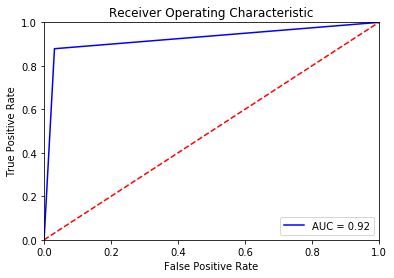

In [8]:
RF_reg = RandomForestClassifier(max_depth= 20, min_samples_split= 2, n_estimators= 200, random_state=0)
RF_reg.fit(X_train_minmax,y_train)

from sklearn import metrics
y_pred_class_train = RF_reg.predict(X_train_minmax)
print('Training Accuracy: ')
print(metrics.accuracy_score(y_train, y_pred_class_train))

y_pred_class = RF_reg.predict(X_valid_minmax)
print('Validation Accuracy: ')
print(metrics.accuracy_score(y_valid, y_pred_class))

print('Confusion Matrix: \n')
confusion = metrics.confusion_matrix(y_valid, y_pred_class)
print(confusion)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_class)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 
0.9171779141104295
Confusion Matrix: 

[[159   2]
 [ 25 140]]


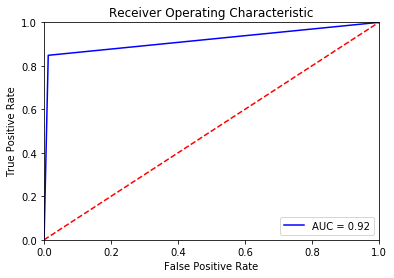

In [10]:
Gradient_reg = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 2, n_estimators= 200, random_state=0)
Gradient_reg.fit(X_train_minmax,y_train)

y_pred_class = Gradient_reg.predict(X_valid_minmax)

from sklearn import metrics
print('Accuracy: ')
print(metrics.accuracy_score(y_valid, y_pred_class))

print('Confusion Matrix: \n')
confusion = metrics.confusion_matrix(y_valid, y_pred_class)
print(confusion)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_class)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 
0.901840490797546
Confusion Matrix: 

[[157   4]
 [ 28 137]]


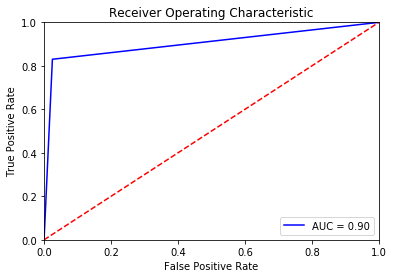

In [9]:
XGB_reg = XGBClassifier(gamma= 0.5,learning_rate= 0.1,max_depth=5)
XGB_reg.fit(X_train_minmax,y_train)

y_pred_class = XGB_reg.predict(X_valid_minmax)

from sklearn import metrics
print('Accuracy: ')
print(metrics.accuracy_score(y_valid, y_pred_class))

print('Confusion Matrix: \n')
confusion = metrics.confusion_matrix(y_valid, y_pred_class)
print(confusion)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_class)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 
0.9294478527607362
Confusion Matrix: 

[[146  15]
 [  8 157]]


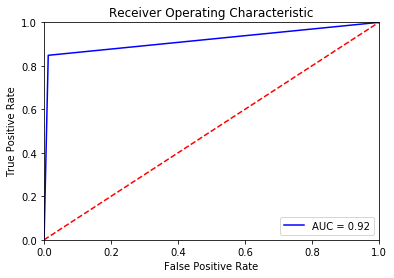

In [11]:
model_svm = svm.SVC(C= 6, gamma= 'scale', kernel= 'rbf',random_state=0,probability=True)
model_svm.fit(X_train_minmax,y_train)

y_pred_class = model_svm.predict(X_valid_minmax)

from sklearn import metrics
print('Accuracy: ')
print(metrics.accuracy_score(y_valid, y_pred_class))

print('Confusion Matrix: \n')
confusion = metrics.confusion_matrix(y_valid, y_pred_class)
print(confusion)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
attrition_percent = model_svm.predict_proba(X_test_minmax)
dataset = pd.DataFrame({'Attrition': attrition_percent[:, 1]})

Id_col = train_df['Id']
Id_col.head()
dataset.insert(0, "Id",Id_col , True)

dataset.set_index('Id', inplace=True)
print (dataset)

     Attrition
Id            
1     0.000794
2     0.002950
3     0.012086
4     0.044864
5     0.001261
..         ...
466   0.035097
467   0.847942
468   0.487252
469   0.024655
470   0.002747

[470 rows x 1 columns]


In [13]:
dataset.to_csv('Sample_submission_Ganesh_Thorat_66.csv')

In [234]:
####### FEATURE IMPORTANCE #### ####
# rank the importance of features
f_impt= pd.DataFrame(RF_reg.feature_importances_,index=X_train.columns)
f_impt = f_impt.sort_values(by=0,ascending=False)
f_impt.columns = ['feature importance']
f_impt

,feature importance
MonthlyIncome,0.097897
Age,0.080278
OverTime,0.064529
TotalWorkingYears,0.064056
DistanceFromHome,0.060570
YearsAtCompany,0.056324
StockOptionLevel,0.051102
PercentSalaryHike,0.045011
JobRole,0.044123
YearsInCurrentRole,0.043756


In [ ]:
dataset.to_csv('Sample_submission_Rucha_Yande_5.csv')

In [ ]:
# Cross Validation

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # Replace this body with your own code
    my_pipeline = Pipeline(steps=[('model', RandomForestClassifier(n_estimators, random_state=0))])
    scores = -1 * cross_val_score(my_pipeline, X_train_minmax, y_train,
                              cv=10,
                              scoring='accuracy')

    return scores.mean()

results = {}
for i in range(1,8):
    results[50*i] = get_score(50*i)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()